# Import Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Data pre-processing

In [ ]:
# Define column names
column_names = ['Instance', 'Cost', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18']

In [ ]:
# Define the function to load data from a directory
def load_data(directory):
    data_frames = []
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            df = pd.read_csv(file_path, names=column_names, sep=';', usecols=range(len(column_names)))
            data_frames.append(df)
    return data_frames

# Define the top-level directory
top_directory = 'HGS/'

# Define the four subsets
subset_2113 = load_data(os.path.join(top_directory, 'HGS/2113'))
subset_2213 = load_data(os.path.join(top_directory, 'HGS/2213'))
subset_3113 = load_data(os.path.join(top_directory, 'HGS/3113'))
subset_3213 = load_data(os.path.join(top_directory, 'HGS/3213'))

In [ ]:
# Data concatenation
concatenated_2113 = pd.concat(subset_2113)
concatenated_2213 = pd.concat(subset_2213)
concatenated_3113 = pd.concat(subset_3113)
concatenated_3213 = pd.concat(subset_3213)

# Data quality checking

In [ ]:
# Data exploration and analysis
print('Descriptive statistic of data file 2113')
concatenated_2113.describe()

Descriptive statistic of data file 2113


,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2536722.0,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06
mean,1.383565e+04,2.259338e+02,9.456018e+01,2.135273e-01,1.185994e-01,4.969812e+02,1.341667e+02,0.0,3.133823e+02,2.686779e-01,1.551036e-01,4.970832e+02,2.718500e-01,1.359205e-01,8.139902e-02,3.212123e+02,4.620309e+02,1.367496e+00,3.303217e+00
std,8.422074e+02,2.759005e+01,2.292549e+01,3.659569e-02,5.823204e-02,2.322348e+01,2.760972e+01,0.0,2.875898e+01,2.678035e-02,1.630883e-02,5.168932e+01,5.757452e-02,2.878794e-02,9.373944e-02,6.924859e+01,1.837892e+01,8.385797e-01,3.799707e-01
min,1.181600e+04,1.310910e+02,1.350800e+01,1.012000e-01,1.770000e-02,4.050000e+02,4.789250e+01,0.0,2.094000e+02,1.831000e-01,9.870000e-02,2.459000e+02,2.000000e-01,1.000000e-01,0.000000e+00,7.813330e+01,3.869850e+02,0.000000e+00,2.083300e+00
25%,1.311500e+04,2.062710e+02,7.893090e+01,1.882000e-01,8.060000e-02,4.827690e+02,1.130800e+02,0.0,2.943000e+02,2.487000e-01,1.439000e-01,4.639170e+02,2.339000e-01,1.170000e-01,1.660000e-02,2.710890e+02,4.492100e+02,8.213000e-01,3.032100e+00
50%,1.402200e+04,2.226780e+02,9.345170e+01,2.086000e-01,1.030000e-01,4.953000e+02,1.365010e+02,0.0,3.141000e+02,2.697000e-01,1.554000e-01,4.972000e+02,2.639000e-01,1.319000e-01,3.330000e-02,3.265770e+02,4.635950e+02,1.433700e+00,3.286500e+00
75%,1.436800e+04,2.426300e+02,1.086120e+02,2.337000e-01,1.370000e-01,5.106670e+02,1.566600e+02,0.0,3.340910e+02,2.892000e-01,1.664000e-01,5.330000e+02,2.894000e-01,1.447000e-01,1.072000e-01,3.749970e+02,4.763190e+02,2.211100e+00,3.553500e+00
max,1.646600e+04,3.800300e+02,3.180630e+02,4.840000e-01,5.539000e-01,5.916000e+02,2.161280e+02,0.0,4.213000e+02,3.636000e-01,2.286000e-01,6.864620e+02,5.333000e-01,2.667000e-01,3.503000e-01,6.082430e+02,5.130430e+02,3.824700e+00,5.616100e+00


In [ ]:
# Data exploration and analysis
print('Descriptive statistic of data file 2213')
concatenated_2213.describe()

Descriptive statistic of data file 2213


,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3302699.0,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06
mean,1.073829e+04,1.372737e+02,8.634914e+01,1.458151e-01,1.131446e-01,4.213288e+02,1.253106e+02,0.0,3.109957e+02,3.247369e-01,1.302215e-01,5.364218e+02,2.719455e-01,1.359677e-01,9.165772e-02,2.975915e+02,3.321542e+02,1.485339e+00,4.009757e+00
std,1.414708e+03,3.407150e+01,3.061812e+01,5.129944e-02,6.264568e-02,5.648133e+01,3.426555e+01,0.0,5.598335e+01,3.459650e-02,2.457457e-02,1.163529e+02,6.099996e-02,3.049957e-02,1.015679e-01,7.510458e+01,8.264542e+01,1.003530e+00,5.770904e-01
min,7.766000e+03,5.917320e+01,1.988140e+01,4.040000e-02,1.770000e-02,2.968000e+02,4.596100e+01,0.0,1.580000e+02,2.079000e-01,6.020000e-02,1.880000e+02,2.000000e-01,1.000000e-01,0.000000e+00,8.678280e+01,1.172220e+02,0.000000e+00,2.280000e+00
25%,9.804000e+03,1.113980e+02,6.344150e+01,1.117000e-01,6.930000e-02,3.716670e+02,1.038680e+02,0.0,2.667500e+02,3.020000e-01,1.107000e-01,4.477500e+02,2.191000e-01,1.095000e-01,1.550000e-02,2.422400e+02,2.657660e+02,8.213000e-01,3.585000e+00
50%,1.068000e+04,1.300310e+02,7.888780e+01,1.373000e-01,9.410000e-02,4.350000e+02,1.175870e+02,0.0,3.067000e+02,3.245000e-01,1.308000e-01,5.224000e+02,2.643000e-01,1.321000e-01,3.330000e-02,2.805980e+02,3.348650e+02,1.612500e+00,3.938900e+00
75%,1.191000e+04,1.615180e+02,1.060310e+02,1.767000e-01,1.508000e-01,4.596000e+02,1.493030e+02,0.0,3.514620e+02,3.463000e-01,1.465000e-01,6.200000e+02,2.983000e-01,1.492000e-01,1.225000e-01,3.542280e+02,3.928910e+02,2.211100e+00,4.350400e+00
max,1.505000e+04,3.805150e+02,3.313820e+02,4.531000e-01,5.700000e-01,5.617000e+02,2.204030e+02,0.0,5.149000e+02,4.384000e-01,2.534000e-01,8.217000e+02,5.333000e-01,2.667000e-01,3.503000e-01,5.973350e+02,5.088730e+02,3.824700e+00,8.561100e+00


In [ ]:
# Data exploration and analysis
print('Descriptive statistic of data file 3113')
concatenated_3113.describe()

Descriptive statistic of data file 3113


,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4137693.0,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06
mean,2.175919e+04,2.028789e+02,9.533067e+01,9.341820e-02,6.051979e-02,8.715416e+02,3.113764e+02,0.0,6.345070e+02,3.348486e-01,1.106162e-01,1.136914e+03,3.212560e-01,1.606260e-01,1.692875e-01,6.710729e+02,4.895648e+02,1.888267e+00,3.767524e+00
std,1.991921e+03,2.532028e+01,2.284763e+01,1.465029e-02,2.225223e-02,4.533718e+01,3.597679e+01,0.0,5.222232e+01,2.101679e-02,1.447097e-02,9.660147e+01,6.271364e-02,3.135866e-02,1.114096e-01,8.276526e+01,1.783896e+01,9.311514e-01,5.318735e-01
min,1.807700e+04,1.069430e+02,1.799330e+01,4.390000e-02,7.300000e-03,7.700000e+02,1.400660e+02,0.0,4.256000e+02,2.450000e-01,6.250000e-02,7.061000e+02,2.000000e-01,1.000000e-01,0.000000e+00,3.359490e+02,3.999430e+02,0.000000e+00,2.100000e+00
25%,2.048900e+04,1.851180e+02,7.973240e+01,8.280000e-02,4.410000e-02,8.392000e+02,2.911680e+02,0.0,5.998330e+02,3.193000e-01,1.005000e-01,1.081580e+03,2.692000e-01,1.346000e-01,3.330000e-02,6.185070e+02,4.740950e+02,1.065900e+00,3.390600e+00
50%,2.181900e+04,2.006040e+02,9.325850e+01,9.270000e-02,5.540000e-02,8.628000e+02,3.169430e+02,0.0,6.342500e+02,3.375000e-01,1.093000e-01,1.142170e+03,3.636000e-01,1.818000e-01,2.457000e-01,6.838060e+02,4.922140e+02,2.211100e+00,3.724000e+00
75%,2.272500e+04,2.184260e+02,1.082730e+02,1.030000e-01,7.490000e-02,8.941540e+02,3.363320e+02,0.0,6.749170e+02,3.506000e-01,1.194000e-01,1.207380e+03,3.704000e-01,1.852000e-01,2.457000e-01,7.238090e+02,5.022730e+02,2.211100e+00,4.095500e+00
max,2.648200e+04,4.151350e+02,3.764310e+02,2.211000e-01,2.262000e-01,1.082100e+03,4.111880e+02,0.0,8.037000e+02,4.057000e-01,2.027000e-01,1.392850e+03,3.704000e-01,1.852000e-01,2.727000e-01,9.582020e+02,5.448200e+02,3.000000e+00,8.844400e+00


In [ ]:
# Data exploration and analysis
print('Descriptive statistic of data file 3213')
concatenated_3213.describe()

Descriptive statistic of data file 3213


,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4132400.0,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06
mean,1.999346e+04,1.320380e+02,9.000354e+01,5.504277e-02,3.900560e-02,8.356010e+02,2.192106e+02,0.0,7.059436e+02,3.985144e-01,8.121530e-02,1.314749e+03,2.976809e-01,1.488366e-01,1.324379e-01,4.808405e+02,3.699737e+02,1.807382e+00,4.453170e+00
std,3.379610e+03,3.152291e+01,3.391581e+01,1.635940e-02,1.829580e-02,1.296117e+02,9.358354e+01,0.0,1.323455e+02,2.918490e-02,2.643881e-02,2.642881e+02,6.631182e-02,3.315633e-02,1.118187e-01,1.861478e+02,1.023027e+02,9.128615e-01,6.878613e-01
min,1.161500e+04,5.332490e+01,1.762830e+01,1.790000e-02,3.500000e-03,4.877270e+02,5.608920e+01,0.0,3.611820e+02,3.024000e-01,3.130000e-02,6.179170e+02,2.000000e-01,1.000000e-01,0.000000e+00,1.296500e+02,1.334920e+02,0.000000e+00,2.321400e+00
25%,1.720800e+04,1.091680e+02,6.405680e+01,4.370000e-02,2.580000e-02,7.778460e+02,1.392130e+02,0.0,6.562500e+02,3.731000e-01,6.230000e-02,1.204920e+03,2.444000e-01,1.222000e-01,2.560000e-02,3.332420e+02,3.155990e+02,1.065900e+00,3.955000e+00
50%,2.036800e+04,1.336220e+02,8.401930e+01,5.530000e-02,3.600000e-02,8.635380e+02,2.114230e+02,0.0,7.319000e+02,3.988000e-01,7.860000e-02,1.355300e+03,2.692000e-01,1.346000e-01,1.072000e-01,4.773045e+02,3.763700e+02,2.108600e+00,4.377300e+00
75%,2.256600e+04,1.543540e+02,1.124180e+02,6.480000e-02,4.810000e-02,9.276000e+02,2.914100e+02,0.0,7.875830e+02,4.195000e-01,9.440000e-02,1.476900e+03,3.657000e-01,1.828000e-01,2.457000e-01,6.349270e+02,4.536340e+02,2.366400e+00,4.890600e+00
max,2.758800e+04,3.495290e+02,3.789620e+02,1.843000e-01,2.294000e-01,1.099200e+03,4.305820e+02,0.0,9.790830e+02,4.654000e-01,2.514000e-01,1.856000e+03,5.333000e-01,2.667000e-01,3.503000e-01,9.045720e+02,5.466440e+02,3.824700e+00,9.945000e+00


In [ ]:
print('Data type and missing value of data file 2113')
concatenated_2113.info()

Data type and missing value of data file 2113
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536722 entries, 0 to 152945
Data columns (total 20 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Instance  object 
 1   Cost      int64  
 2   S1        float64
 3   S2        float64
 4   S3        float64
 5   S4        float64
 6   S5        float64
 7   S6        float64
 8   S7        int64  
 9   S8        float64
 10  S9        float64
 11  S10       float64
 12  S11       float64
 13  S12       float64
 14  S13       float64
 15  S14       float64
 16  S15       float64
 17  S16       float64
 18  S17       float64
 19  S18       float64
dtypes: float64(17), int64(2), object(1)
memory usage: 406.4+ MB


In [ ]:
print('Data type and missing value of data file 2213')
concatenated_2213.info()

Data type and missing value of data file 2213
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3302699 entries, 0 to 93182
Data columns (total 20 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Instance  object 
 1   Cost      int64  
 2   S1        float64
 3   S2        float64
 4   S3        float64
 5   S4        float64
 6   S5        float64
 7   S6        float64
 8   S7        int64  
 9   S8        float64
 10  S9        float64
 11  S10       float64
 12  S11       float64
 13  S12       float64
 14  S13       float64
 15  S14       float64
 16  S15       float64
 17  S16       float64
 18  S17       float64
 19  S18       float64
dtypes: float64(17), int64(2), object(1)
memory usage: 529.1+ MB


In [ ]:
print('Data type and missing value of data file 3113')
concatenated_3113.info()

Data type and missing value of data file 3113
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4137693 entries, 0 to 167789
Data columns (total 20 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Instance  object 
 1   Cost      int64  
 2   S1        float64
 3   S2        float64
 4   S3        float64
 5   S4        float64
 6   S5        float64
 7   S6        float64
 8   S7        int64  
 9   S8        float64
 10  S9        float64
 11  S10       float64
 12  S11       float64
 13  S12       float64
 14  S13       float64
 15  S14       float64
 16  S15       float64
 17  S16       float64
 18  S17       float64
 19  S18       float64
dtypes: float64(17), int64(2), object(1)
memory usage: 662.9+ MB


In [ ]:
print('Data type and missing value of data file 3213')
concatenated_3213.info()

Data type and missing value of data file 3213
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132400 entries, 0 to 139033
Data columns (total 20 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Instance  object 
 1   Cost      int64  
 2   S1        float64
 3   S2        float64
 4   S3        float64
 5   S4        float64
 6   S5        float64
 7   S6        float64
 8   S7        int64  
 9   S8        float64
 10  S9        float64
 11  S10       float64
 12  S11       float64
 13  S12       float64
 14  S13       float64
 15  S14       float64
 16  S15       float64
 17  S16       float64
 18  S17       float64
 19  S18       float64
dtypes: float64(17), int64(2), object(1)
memory usage: 662.1+ MB


There are no Null values (missing values), but the column S7 has only 0 as value everywhere in the 4 datasets

# Data visualization

<Figure size 1500x800 with 0 Axes>

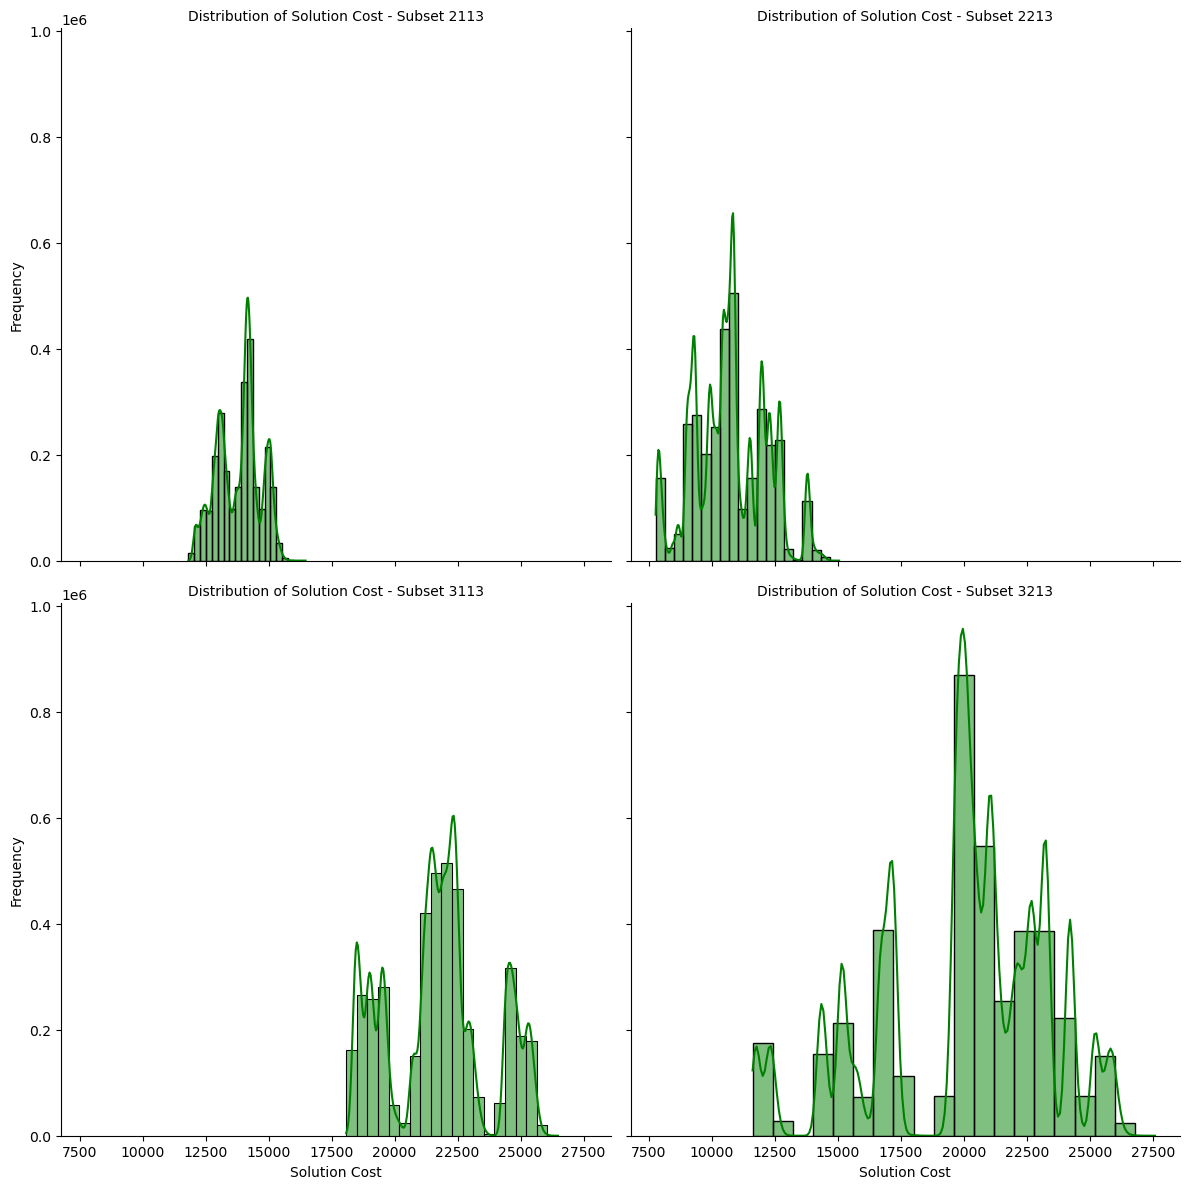

In [ ]:
# Create a new column 'Subset' to distinguish between subsets
concatenated_2113['Subset'] = '2113'
concatenated_2213['Subset'] = '2213'
concatenated_3113['Subset'] = '3113'
concatenated_3213['Subset'] = '3213'

# Concatenate all subsets into a single DataFrame
all_data = pd.concat([concatenated_2113, concatenated_2213, concatenated_3113, concatenated_3213], ignore_index=True)

# Visualize the distribution of the target variable for each subset
plt.figure(figsize=(15, 8))
g = sns.FacetGrid(all_data, col='Subset', col_wrap=2, height=6)
g.map(sns.histplot, 'Cost', bins=20, kde=True, color='green')
g.set_titles('Distribution of Solution Cost - Subset {col_name}')
g.set_axis_labels('Solution Cost', 'Frequency')
plt.show()

# Data preparation for analysis

In [ ]:
## removing the feature S7, Subset and Instance
concatenated_2113.drop(['S7','Subset','Instance'], axis = 1, inplace = True)
concatenated_2213.drop(['S7','Subset','Instance'], axis = 1, inplace = True)
concatenated_3113.drop(['S7','Subset','Instance'], axis = 1, inplace = True)
concatenated_3213.drop(['S7','Subset','Instance'], axis = 1, inplace = True)

## Feature to retain the configuration information

In [ ]:
## in 2113, depot centered and clients in random positions
concatenated_2113['Depot'] = 0
concatenated_2113['Clients'] = 1

In [ ]:
## in 2213, depot centered and clients in clusters
concatenated_2213['Depot'] = 0
concatenated_2213['Clients'] = 0

In [ ]:
## in 3113, depot in a corner and clients in random positions
concatenated_3113['Depot'] = 1
concatenated_3113['Clients'] = 1

In [ ]:
## in 3213, depot in a corner and clients in clusters
concatenated_3213['Depot'] = 1
concatenated_3213['Clients'] = 0

In [ ]:
## fusion all the 4 datasets in one dataset

data = pd.concat([concatenated_2113, concatenated_2213, concatenated_3113, concatenated_3213])


In [ ]:
from sklearn.utils import shuffle

# Shuffle the concatenated dataframe
data = shuffle(data).reset_index(drop=True)

In [ ]:
data.head()

,Cost,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,Depot,Clients
0,13317,261.666,78.7156,0.2699,0.1487,549.20,120.7300,317.6,0.2398,0.1594,491.00,0.2000,0.1000,0.0000,244.690,501.140,0.0000,3.2611,0,1
1,19621,179.709,84.2067,0.0697,0.0362,918.50,274.9750,601.0,0.3138,0.0997,1069.70,0.3636,0.1818,0.2727,600.874,470.474,3.0000,4.0400,1,1
2,25827,132.451,86.1570,0.0419,0.0267,1037.83,184.9570,912.5,0.4238,0.0726,1704.25,0.2530,0.1265,0.0384,383.118,484.376,1.4337,4.0538,1,0
3,15124,163.897,145.3580,0.0635,0.0354,688.80,282.2920,527.6,0.3617,0.0834,1020.40,0.3636,0.1818,0.2727,661.516,356.187,3.0000,4.1000,1,0
4,12856,218.111,72.3332,0.1872,0.0781,537.40,89.4776,326.2,0.2506,0.1635,460.70,0.2000,0.1000,0.0000,240.529,464.263,0.0000,3.6111,0,1


# Feature - cost correlation analysis

## Matrix of correlation

To check if there is any correlation between features and the column cost, and also between features.

Bright Red: Indicates a strong positive correlation. When a feature increases, the "Cost" variable also tends to increase.

Dark Blue: Indicates a strong negative correlation. When a feature increases, the "Cost" variable tends to decrease.

Neutral (White): Near-zero correlation, meaning the feature and "Cost" are not strongly related.

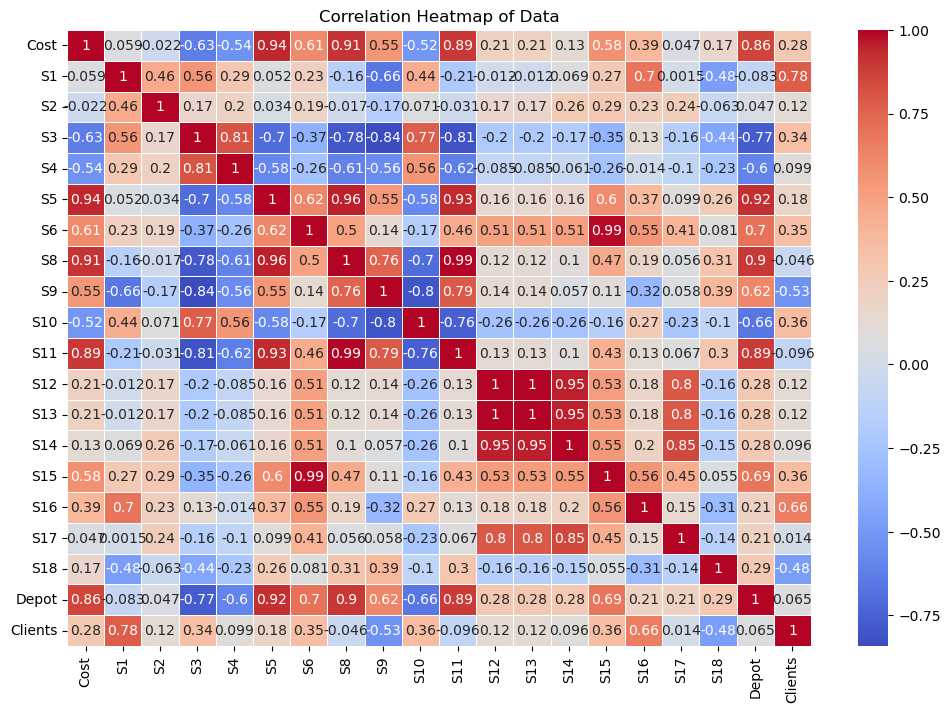

In [ ]:
# Calculate the correlation matrix
correlation_data = data.corr()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Data')
plt.show()

Comments:
1.S12, S13 and S14 are correlated together, so we might need to keep only 1 feature between them.
2.Features S5, S8, S11 and Depot have strong correlation with cost. Above, we will analyse it further.

After calculating and visualizing the Pearson correlation, we will calculate the p-value to validate the results.

In [ ]:
## checking the p-value for the features which have strong Pearson correlation with the cost
from scipy.stats import pearsonr

correlation_S5, p_value_S5 = pearsonr(correlation_data['Cost'], correlation_data['S5'])
correlation_S8, p_value_S8 = pearsonr(correlation_data['Cost'], correlation_data['S8'])
correlation_S11, p_value_S11 = pearsonr(correlation_data['Cost'], correlation_data['S11'])
correlation_Depot, p_value_Depot = pearsonr(correlation_data['Cost'], correlation_data['Depot'])
# Display the correlation and p-value
print(f"Pearson correlation S5: {correlation_S5}", f"P-value S5: {p_value_S5}")
print(f"Pearson correlation S8: {correlation_S8}", f"P-value S5: {p_value_S8}")
print(f"Pearson correlation S11: {correlation_S11}", f"P-value S5: {p_value_S11}")
print(f"Pearson correlation Depot: {correlation_Depot}", f"P-value S5: {p_value_Depot}")

Pearson correlation S5: 0.9951460484519296 P-value S5: 1.395748772786477e-19
Pearson correlation S8: 0.9757703766909213 P-value S5: 2.5037435618660296e-13
Pearson correlation S11: 0.9681925177127847 P-value S5: 2.819977143804802e-12
Pearson correlation Depot: 0.9746401704090024 P-value S5: 3.758385646994113e-13


For S5, S8, S11, Depot, we see a high value of correlation, which means there is a strong, positive linear relationship between them and the cost.
All of them have small p-value, which suggests that the observed correlation is statistically significant. In other words, it is highly unlikely to observe such a strong correlation if there were no true association between cost and them.

Please note that the correlation value seen in the graph and the one calculated in the investigation are difference because df.corr() in pandas calculates the Pearson correlation coefficient using the standard formula for Pearson correlation, while pearsonr from scipy.stats may use a slightly different algorithm or approach for numerical stability.

# Feature selection

In [ ]:
## remove S13 and S14 due to their correlation with S12
data.drop(['S13','S14'], axis = 1, inplace = True)

In [ ]:
# Split the data into 2 datasets input/output
X= data.drop(columns=['Cost'])
y= data['Cost']

# Regression models

## KNN regressor

For computational reasons, we need to reduce the dimensions of our dataset. Without a PCA, the regressors are unable to run in our personal machines.
We will reduce the features into 10 dimensions before further analyses.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Create a PCA instance with the desired number of components
n_components = 10
pca = PCA(n_components=n_components)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X_standardized)

# The transformed data (X_pca) now has reduced dimensionality

# Optional: Display the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

# Display the first few rows of the transformed DataFrame
print("Transformed Data (PCA):")
print(df_pca.head())


Explained Variance Ratio:
[0.41987307 0.24349553 0.10975257 0.06493831 0.0557858  0.0315455
 0.02097648 0.01943947 0.01282387 0.00735096]
Transformed Data (PCA):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.397409 -2.670058  0.457656 -1.227446 -0.864932 -0.146870 -0.892749   
1  1.510488 -1.658749  2.176174 -0.151970 -0.535860  0.486196  0.133780   
2 -2.065798  1.790892  0.415488  0.071728 -0.567836 -0.414641  0.006538   
3 -1.783029  2.131508  0.578247 -0.298065 -0.406319 -0.168975 -0.339477   
4  3.863175  0.630269 -0.883627  0.002985 -0.398251  0.706437  0.347599   

        PC8       PC9      PC10  
0 -0.855428  0.356933  0.124208  
1 -0.015231  0.425110 -0.275301  
2  0.435722  0.518619 -0.088214  
3 -0.051713  0.552769  0.151893  
4  0.210487  0.479187  0.170502  


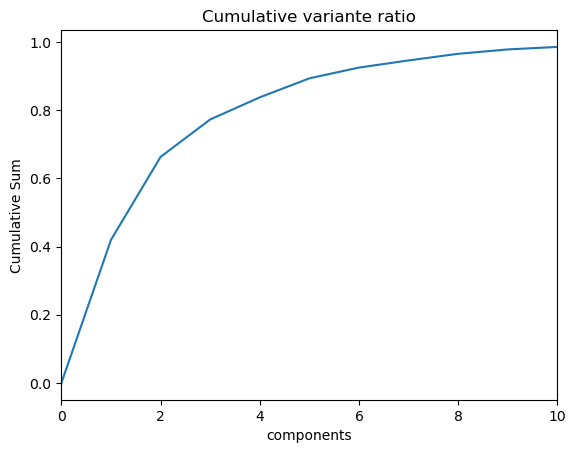

In [ ]:
ratio= [0, 0.41987307, 0.24349553, 0.10975257, 0.06493831, 0.0557858, 0.0315455,
                 0.02097648, 0.01943947, 0.01282387, 0.00735096]

# Calculate the cumulative sum using numpy
cumulative_sum = np.cumsum(ratio)

# Plot the cumulative sum
plt.plot(cumulative_sum)
plt.title('Cumulative variante ratio')
plt.xlabel('components')
plt.ylabel('Cumulative Sum')
plt.xlim(0,10)
plt.show()


In [ ]:
## setting train /test dataset
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=9)  # You can adjust the number of neighbors

# Train the model on the training set
knn_model.fit(X_train, y_train)   ## X already scaled

# Make predictions on the testing set
y_pred1 = knn_model.predict(X_test)  ## X already scaled

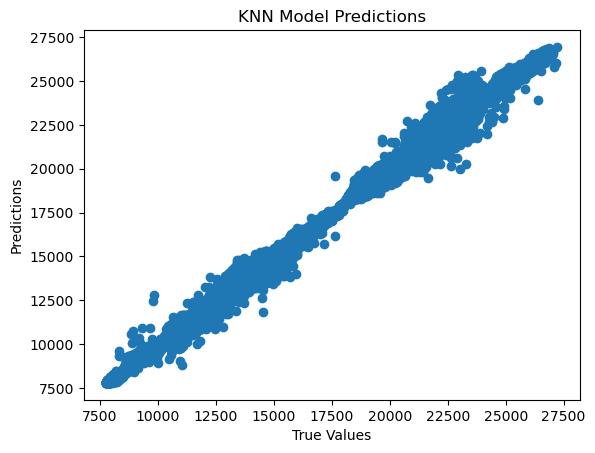

In [ ]:
# Visualize the predictions
plt.scatter(y_test, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN Model Predictions')
plt.show()

In [ ]:
# Evaluate the performance of the model
mae_knn = metrics.mean_absolute_error(y_test, y_pred1)
print(f"MAE: {mae_knn}")

mse_knn = metrics.mean_squared_error(y_test, y_pred1)
print(f"MSE: {mse_knn}")

rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print(f"RMSE: {rmse_knn}")

MAE: 57.68934576733815
MSE: 8415.845858334898
RMSE: 91.73791941359308


## Data preparation for Tree algorithms

NB: for the other algorithms, we won't reduce the dimensions nor scaled.

In [ ]:
## setting train /test dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree regressor

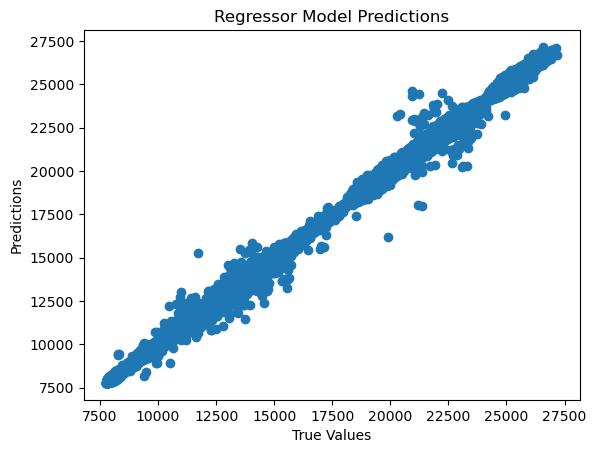

In [ ]:
# Initializing the Regression Tree
regressor = DecisionTreeRegressor(random_state=0)

# Fit the model on the training set
regressor.fit(X_train_2, y_train_2)

# Make predictions on the testing set
y_pred2 = regressor.predict(X_test_2)

# Optionally, you can visualize the predictions
plt.scatter(y_test_2, y_pred2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Regressor Model Predictions')
plt.show()

In [ ]:
# Evaluate the performance of the model
mae_dt = metrics.mean_absolute_error(y_test_2, y_pred2)
print(f"MAE: {mae_dt}")

mse_dt = metrics.mean_squared_error(y_test_2, y_pred2)
print(f"MSE: {mse_dt}")

rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred2))
print(f"RMSE: {rmse_dt}")

MAE: 46.69972851653654
MSE: 5484.768135545411
RMSE: 74.0592204627176


## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Set up the regressor
model_GB = GradientBoostingRegressor()

model_GB.fit(X_train_2, y_train_2)
# make prediction
y_pred4 = model_GB.predict(X_test_2)

In [ ]:
# Evaluate the performance of the model
mae_gb = metrics.mean_absolute_error(y_test_2, y_pred4)
print(f"MAE: {mae_gb}")

mse_gb = metrics.mean_squared_error(y_test_2, y_pred4)
print(f"MSE: {mse_gb}")

rmse_gb = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred4))
print(f"RMSE: {rmse_gb}")

MAE: 197.80733301531274
MSE: 76232.28391880517
RMSE: 276.1019447935946


## XGBoosting

In [ ]:
model_XGB1 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

##inspect the parameters
model_XGB1.get_params()

# train the model
model_XGB1.fit(X_train_2, y_train_2)

# make prediction
y_pred3 = model_XGB1.predict(X_test_2)

In [ ]:
# Evaluate the performance of the model
mae_xgb1 = metrics.mean_absolute_error(y_test_2, y_pred3)
print(f"MAE: {mae_xgb1}")

mse_xgb1 = metrics.mean_squared_error(y_test_2, y_pred3)
print(f"MSE: {mse_xgb1}")

rmse_xgb1 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred3))
print(f"RMSE: {rmse_xgb1}")

MAE: 71.80653699023097
MSE: 9971.526073071545
RMSE: 99.8575288752508


The xgboost is far better than the simple gradient boosting regression in terms of complexity (computational time) and learning (metric values). For the comparison, we will only consider KNN, DT and XGBoost.


## Comparison

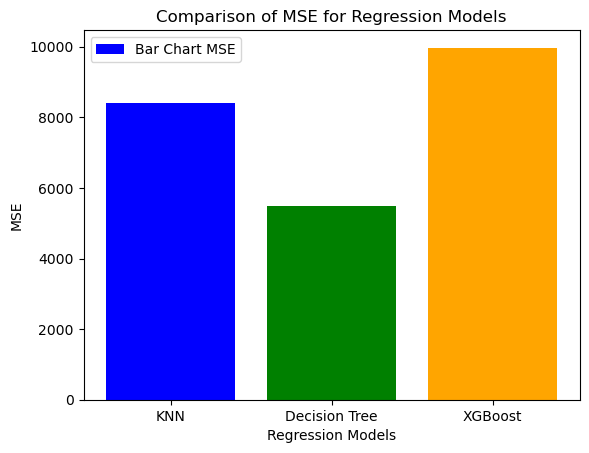

In [ ]:
# Names of the models
models = ['KNN', 'Decision Tree', 'XGBoost']

# MSE values
##mse_values= [8415.845858334898, 5484.768135545411, 9971.526073071545]
mse_values = [mse_knn, mse_dt, mse_xgb]

# Plotting the bar chart
plt.bar(models, mse_values, label='Bar Chart MSE', color=['blue', 'green', 'orange'])

plt.xlabel('Regression Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE for Regression Models')
plt.legend()
plt.show()

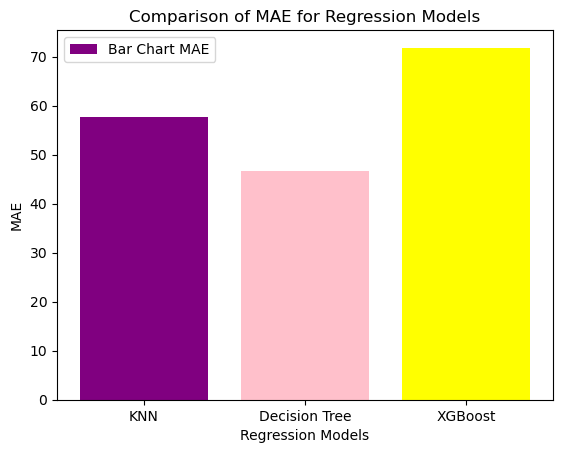

In [ ]:
# Names of the models
models = ['KNN', 'Decision Tree', 'XGBoost']

# MAE values
mae_values = [mae_knn, mae_dt, mae_xgb]
##mae_values= [57.68934576733815, 46.69972851653654, 71.80653699023097]

# Plotting the bar chart
plt.bar(models, mae_values, label='Bar Chart MAE', color=['purple', 'pink', 'yellow'])

plt.xlabel('Regression Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Regression Models')
plt.legend()
plt.show()

In our case, the DT regression gave the best result of learning the cost overall. However, for the computational complexity and running time, the XGBoost has been very efficient and quick for giving us a result and a quite good result.